# Practice 8

## Question 1

Create a 2 by 3 numpy array containing the following data:

$$
\begin{bmatrix}
10 & 12 & 13\\
5 & 6 & 7
\end{bmatrix}
$$

Use slicing to create:

1. An array containing the first row
1. An array containing the last column
1. A 2 by 2 array containing the last two columns

Calculate:

1. A 3 element array containing the sum of each column
1. A 2 element array containing the sum of each row

In [2]:
x = np.array([[10, 12, 13],
              [5, 6, 7]])
row_1 = x[0,:]
print("First row:", row_1)

column_2 = x[:,2]
print("last column:", column_2)

last_2_columns = x[:,1:]
print("last 2 columns:", last_2_columns)

s = np.sum(x)
print("Sum:", s)

sum_column = x[:,0] + x[:,1]  + x[:,2]
print("sum of columns:", sum_column)

sum_row = x[0,:] + x[1,:]
print("sum of rows:", sum_row)

First row: [10 12 13]
last column: [13  7]
last 2 columns: [[12 13]
 [ 6  7]]
Sum: 53
sum of columns: [35 18]
sum of rows: [15 18 20]


## Question 2

The $(x, y)$ co-ordinates of a particle measured at 1 second intervals is given below.

1. Create a 2 by 8 numpy array `z`, where the first row is x-coordinates and the second row is y-coordinates.
1. Plot the motion of the particle with the x-coordinate on the x-axis and y-coordinate on the y-axis.
1. Use vector operations to calculate a one-dimensional array `r` containing the distance of the particle from the origin at each time point.
1. The velocity of the particle can be calculated by subtracting consecutive coordinates. To do this, use slicing to construct two 2 by 7 arrays, one containing the first 7 co-ordinates and the second the last 7 co-ordinates, then subtract one from the other.


| x | y |
| --- | ----------- |
| 1 | 0 |
| 2 | 0.5 |
| 3 | 0.7 |
| 4 | 0.6 |
| 4.5 | 0.1 |
| 4 | -0.3|
| 3| -0.5 |
| 2 | -0.6 |



[[ 1.   1.   1.   0.5 -0.5 -1.  -1. ]
 [ 0.5  0.2 -0.1 -0.5 -0.4 -0.2 -0.1]]


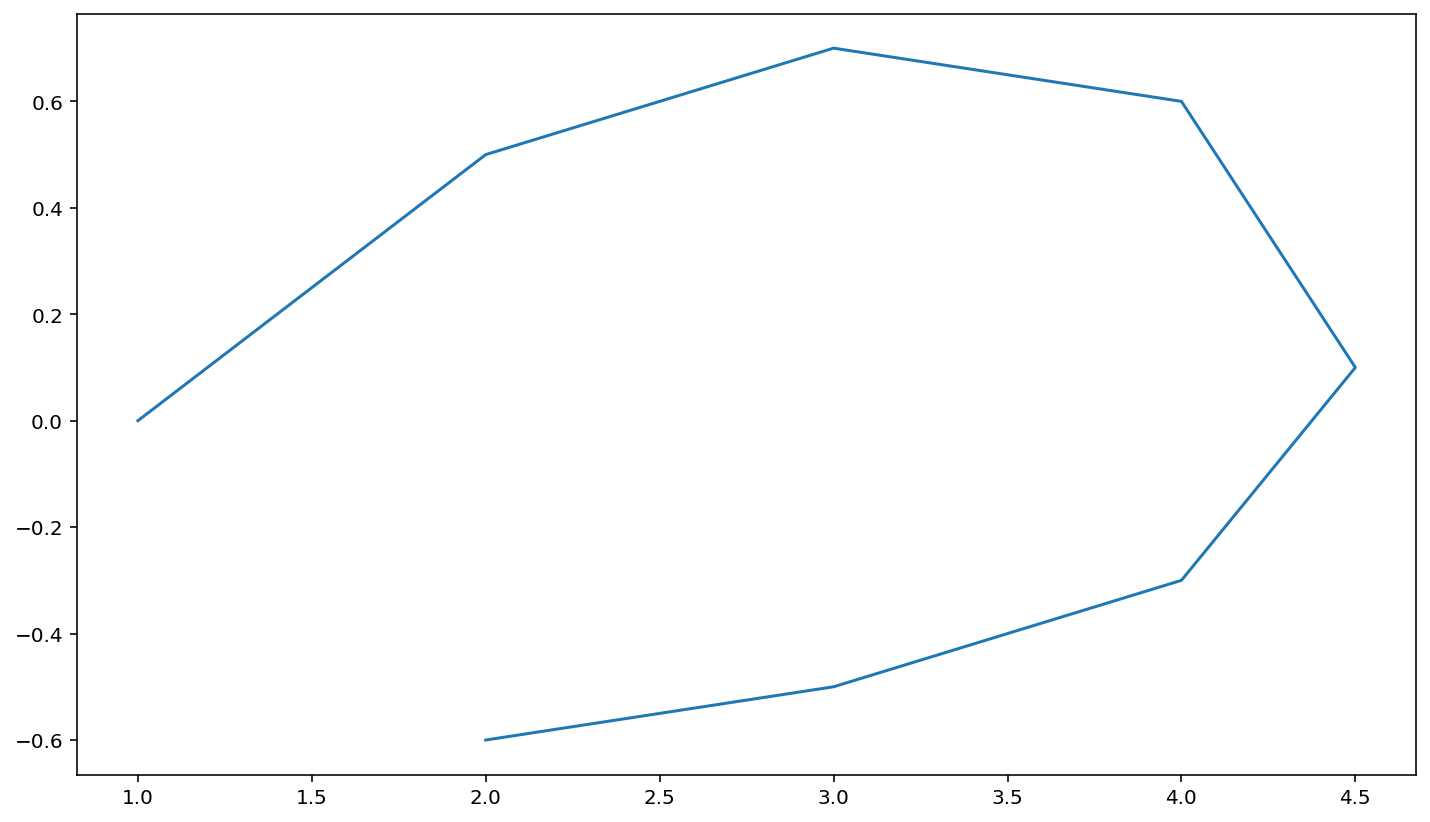

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z = np.array([[1, 2, 3, 4, 4.5, 4, 3, 2],
              [0, 0.5, 0.7, 0.6, 0.1, -0.3, -0.5, -0.6]])

plt.plot(z[0,:], z[1,:])

r = np.sqrt(z[0,:]**2 + z[1,:]**2)

v = z[:,1:] - z[:,:-1]



## Question 3

A particle follows a trajectory given by the following equations:

$$
x = 4\sin(7t)\\
y = 4\cos(6t)
$$

Use `np.arange` to create an array `t` containing evenly spaced time points from 0 to 10 with an interval of 0.1. Calculate arrays `x` and `y` containing the x and y co-ordinates, then plot the x and y co-ordinates against time on the same graph. On a seperate graph, plot x against y.

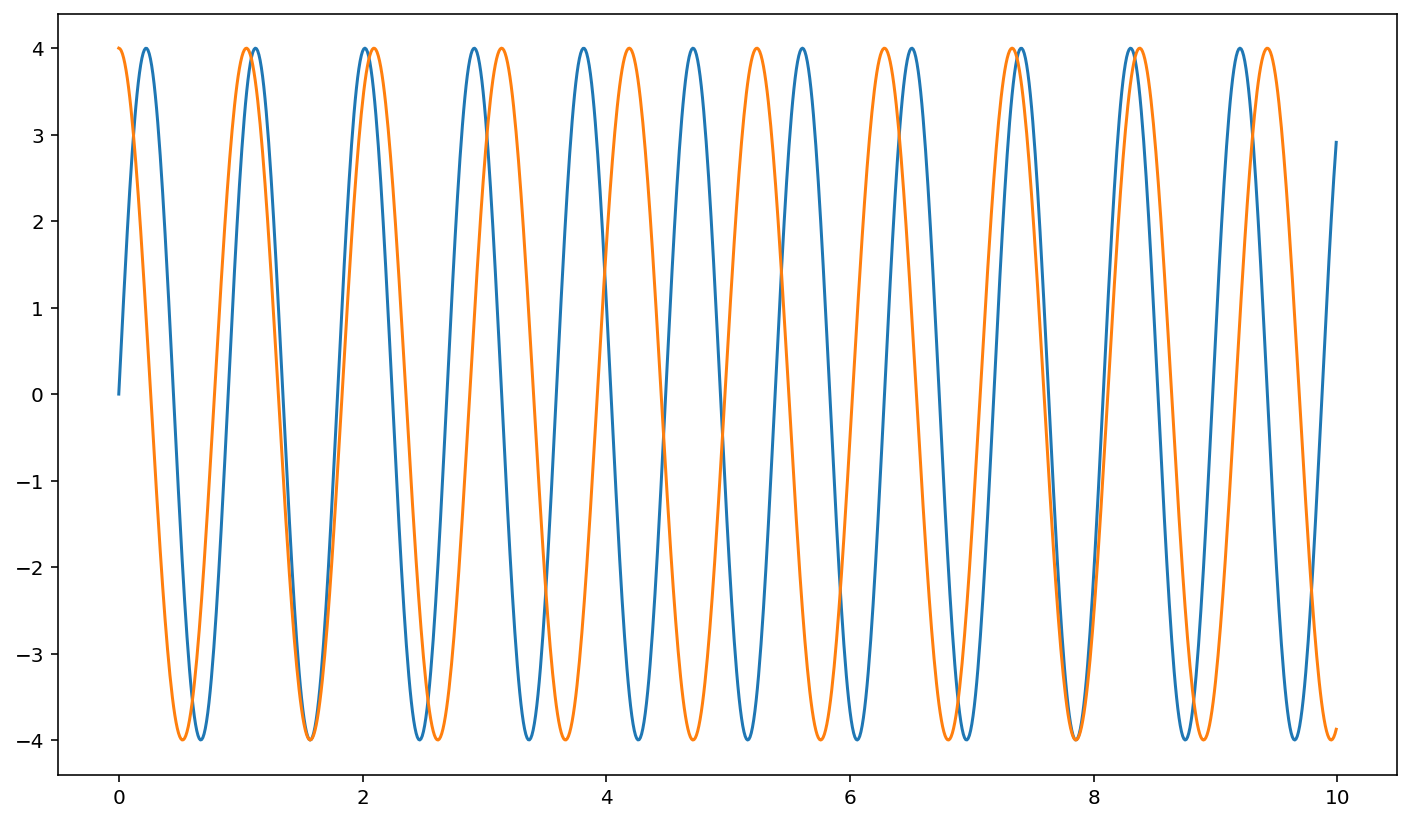

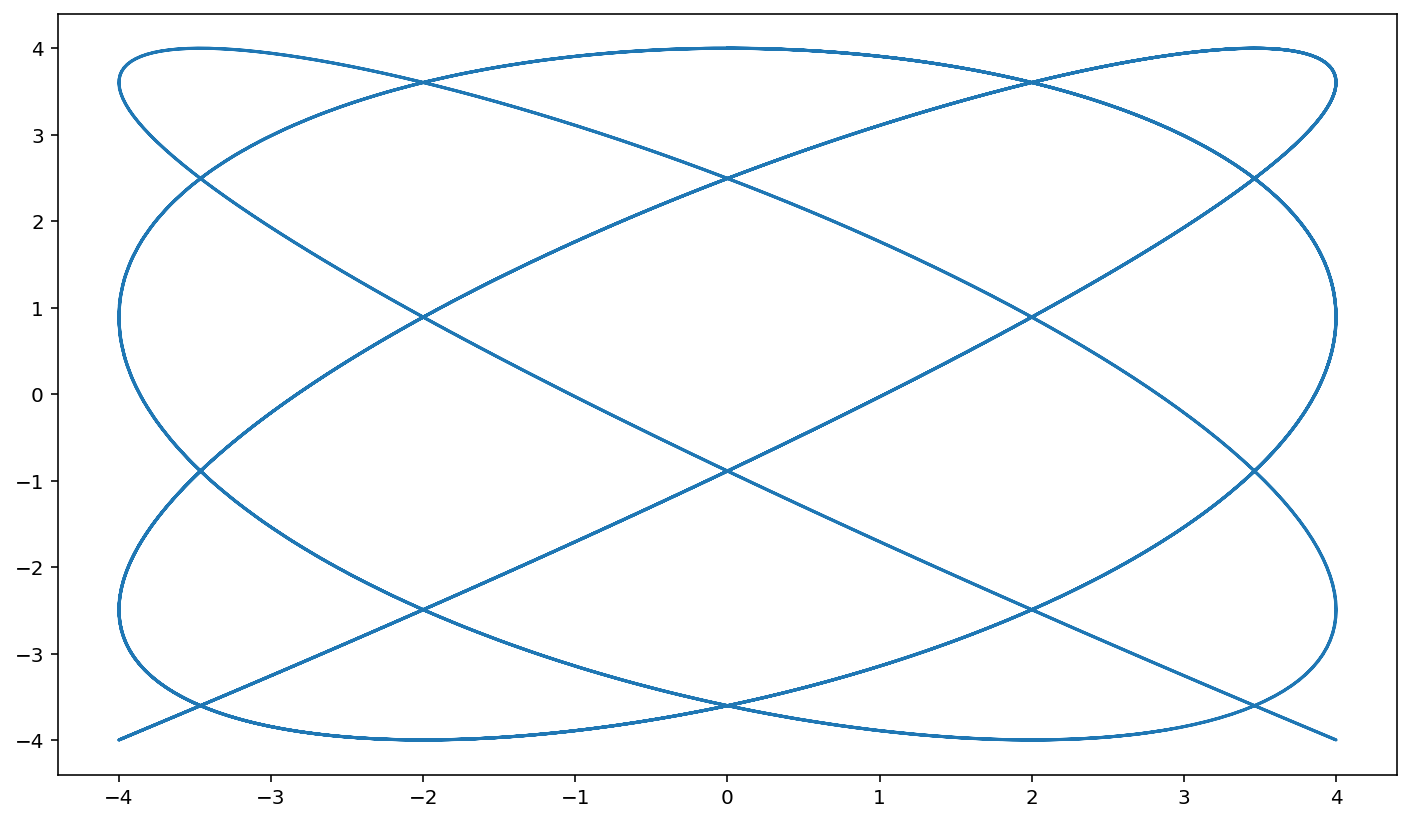

In [19]:
alpha = 1
t = np.arange(0, 10, .01)
x = 4 * np.sin(7*t)
y = 4 * np.cos(6*t)

plt.figure()
plt.plot(t, x)
plt.plot(t, y)
plt.figure()
plt.plot(x, y)

## Question 4

The differential equations for a damped linear oscillator are given by:

$$ \begin{align*}
\frac{dx}{dt} &= v\\
\frac{dv}{dt} &= (-k/m)x - (c/m)v
\end{align*}$$

Resulting in the following discrete equations:

$$ \begin{align*}
x_{i+1} &= x_i + v_i\Delta t\\
v_{i+1} &= v_i - (k/m)x_i\Delta t - (c/m)v_i\Delta t
\end{align*}$$

where $c$ is a positive constant representing damping strength.

Copy the linear oscillator code from the notes, then adapt it to include the damping term. Estimate the minimum value of $c$ such that no oscillations occur.

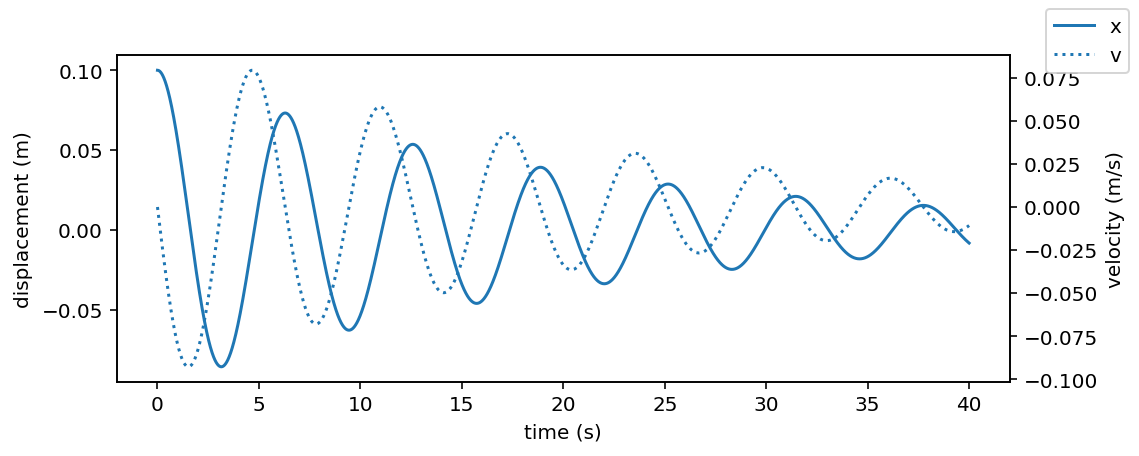

In [13]:
import matplotlib.pyplot as plt
import numpy as np

t_max = 40
delta_t = 0.001 # time step is 1 ms
k = 0.1
m = 0.1
c = 0.01

t = np.arange(0, t_max, delta_t) # array of time points from 0 to t_max

n_steps = len(t)

x = np.zeros(n_steps)
v = np.zeros(n_steps)

x[0] = 0.1 # initial displacement
v[0] = 0 # initial velocity

for i in range(n_steps - 1):
    x[i+1] = x[i] + v[i] * delta_t
    v[i+1] = v[i] - (k/m)*x[i]*delta_t - (c/m)*v[i]*delta_t
    
# Note the rather complicated method for setting up the plots
# So that we can have a single legend but separate axes for displacement
# and velocity

fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot()
ax.plot(t, x, ls="-", label="x")
ax.set_ylabel("displacement (m)")
ax.set_xlabel("time (s)")
ax_r = ax.twinx() # allows us to have separate y-axes on left and right
ax_r.plot(t, v, ls=":", label="v")
ax_r.set_ylabel("velocity (m/s)")
fig.legend()    